In [31]:
import pandas as pd
import numpy as np

import math

In [32]:
import pandas as pd

df1_deliveries = pd.read_csv(r'C:\Users\deshp\OneDrive\Desktop\internship tasks\diminos_data_v2\deliveries.csv')
df2_order_items=pd.read_csv(r'C:\Users\deshp\OneDrive\Desktop\internship tasks\diminos_data_v2\order_items.csv')
df3_orders=pd.read_csv(r'C:\Users\deshp\OneDrive\Desktop\internship tasks\diminos_data_v2\orders.csv')
df4_products=pd.read_csv(r'C:\Users\deshp\OneDrive\Desktop\internship tasks\diminos_data_v2\products.csv')

In [33]:
df1_deliveries

,order_id,time_stamp,status
0,321230114,2020-12-11 00:01:29.000000000,Pending
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery
2,321230114,2020-12-11 00:19:13.299151076,Delivered
3,321230115,2020-12-11 00:36:02.000000000,Pending
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery
...,...,...,...
1363003,321684446,2024-01-31 23:58:08.494812502,Delivered
1363004,321684449,2024-02-01 00:00:46.000000000,Out For Delivery
1363005,321684448,2024-02-01 00:03:05.000000000,Out For Delivery
1363006,321684449,2024-02-01 00:14:56.997433391,Delivered


In [34]:
df1_deliveries.shape

(1363008, 3)

In [35]:
df1_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363008 entries, 0 to 1363007
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   order_id    1363008 non-null  int64 
 1   time_stamp  1363008 non-null  object
 2   status      1363008 non-null  object
dtypes: int64(1), object(2)
memory usage: 31.2+ MB


In [36]:
df1_deliveries.describe()

,order_id
count,1.363008e+06
mean,3.214573e+08
std,1.311556e+05
min,3.212301e+08
25%,3.213437e+08
50%,3.214573e+08
75%,3.215709e+08
max,3.216844e+08


In [37]:
df2_order_items.shape


(454336, 2)

In [38]:
df2_order_items

,order_id,items_ordered
0,321230114,"['p_025', 'p_032', 'p_037']"
1,321230115,"['p_017', 'p_012']"
2,321230116,"['p_027', 'p_037']"
3,321230117,"['p_004', 'p_029']"
4,321230118,"['p_017', 'p_037']"
...,...,...
454331,321684445,"['p_002', 'p_006', 'p_037']"
454332,321684446,"['p_015', 'p_013']"
454333,321684447,"['p_009', 'p_016']"
454334,321684448,"['p_007', 'p_003', 'p_037']"


In [39]:
df3_orders

,order_id,order_placed_at
0,321230114,2020-12-11 00:01:29
1,321230115,2020-12-11 00:36:02
2,321230116,2020-12-11 00:55:01
3,321230117,2020-12-11 01:05:27
4,321230118,2020-12-11 01:14:20
...,...,...
454331,321684445,2024-01-31 23:27:51
454332,321684446,2024-01-31 23:40:14
454333,321684447,2024-01-31 23:36:08
454334,321684448,2024-01-31 23:58:05


In [40]:
df3_orders.shape

(454336, 2)

In [41]:
df3_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454336 entries, 0 to 454335
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   order_id         454336 non-null  int64 
 1   order_placed_at  454336 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.9+ MB


In [42]:
df4_products

,item_id,category,Item,Size,Price
0,p_001,Veg,Margherita,Regular,109
1,p_002,Veg,Margherita,Medium,245
2,p_003,Veg,Margherita,Large,455
3,p_004,Veg,Double Cheese Margherita,Regular,215
4,p_005,Veg,Double Cheese Margherita,Medium,385
5,p_006,Veg,Double Cheese Margherita,Large,619
6,p_007,Veg,Farm House,Regular,265
7,p_008,Veg,Farm House,Medium,469
8,p_009,Veg,Farm House,Large,705
9,p_010,Veg,Deluxe Veggie,Regular,219


In [43]:
df4_products.shape

(37, 5)

In [44]:
df4_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item_id   37 non-null     object
 1   category  37 non-null     object
 2   Item      37 non-null     object
 3   Size      37 non-null     object
 4   Price     37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [121]:
# Convert timestamps to datetime objects
df1_deliveries['time_stamp'] = pd.to_datetime(df1_deliveries['time_stamp'])

# 1Q:-What is the average Delivery Time (in minutes) taken by the store to deliver the Pizza?



In [159]:
df1_deliveries['time_stamp'] = pd.to_datetime(df1_deliveries['time_stamp'])


In [160]:
df3_orders['order_placed_at']= pd.to_datetime(df3_orders['order_placed_at'])

In [161]:
df1_deliveries['time_stamp'] = pd.to_datetime(df1_deliveries['time_stamp'])

In [162]:
merged_df = pd.merge(df1_deliveries,df3_orders,on='order_id',how='inner')

In [163]:
x = merged_df.loc[(merged_df['status']=='Delivered')]

In [164]:
x = merged_df.loc[(merged_df['status']=='Delivered')]

In [165]:
x

,order_id,time_stamp,status,order_placed_at
2,321230114,2020-12-11 00:19:13.299151076,Delivered,2020-12-11 00:01:29
5,321230115,2020-12-11 00:59:18.054846609,Delivered,2020-12-11 00:36:02
8,321230116,2020-12-11 01:13:52.153042625,Delivered,2020-12-11 00:55:01
11,321230117,2020-12-11 01:22:44.430088094,Delivered,2020-12-11 01:05:27
14,321230118,2020-12-11 01:32:27.488575946,Delivered,2020-12-11 01:14:20
...,...,...,...,...
1362995,321684445,2024-01-31 23:45:54.185192716,Delivered,2024-01-31 23:27:51
1362998,321684447,2024-01-31 23:56:35.426400154,Delivered,2024-01-31 23:36:08
1363001,321684446,2024-01-31 23:58:08.494812502,Delivered,2024-01-31 23:40:14
1363004,321684449,2024-02-01 00:14:56.997433391,Delivered,2024-01-31 23:55:46


In [166]:
x['difference'] = x['time_stamp']-x['order_placed_at']

C:\Users\deshp\AppData\Local\Temp\ipykernel_22312\1320131810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['difference'] = x['time_stamp']-x['order_placed_at']


In [175]:
x['difference'] = x['difference'].dt.total_seconds()/60

C:\Users\deshp\AppData\Local\Temp\ipykernel_22312\2584752717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['difference'] = x['difference'].dt.total_seconds()/60


In [176]:
x['difference'].mean()

20.647560770745944

In [177]:
np.round(x['difference'].mean(),2)

20.65

### 1 ans:-20.65

### 2Q:-What is the 99th percentile Delivery Time (in minutes) taken by the store to deliver the Pizza?


In [169]:
x['difference'].describe()

count                       454336
mean     0 days 00:20:38.853646244
std      0 days 00:03:00.459129376
min      0 days 00:15:22.104888994
25%      0 days 00:18:33.634059335
50%      0 days 00:19:58.899693726
75%      0 days 00:21:58.782221573
max      0 days 01:02:54.724687723
Name: difference, dtype: object

In [170]:
percentile99=x['difference'].quantile(0.99)

In [171]:
percentile99

Timedelta('0 days 00:30:53.725475329')

### ANS:-30.89

### 3Q:-Which metric is the better choice to determine the stores performance based on Delivery Time?


In [172]:
print(x['difference'].quantile(0.99))
print(x['difference'].quantile(0.95))

0 days 00:30:53.725475329
0 days 00:26:21.078021844


### ANS:-95th or 99th Percentile

### 4Q:-What is the order id with the maximum delivery time?

In [173]:
x['difference'].max()

Timedelta('0 days 01:02:54.724687723')

In [174]:
x.loc[(x['difference']=='0 days 01:02:54.724687723')]

,order_id,time_stamp,status,order_placed_at,difference
1196819,321629049,2023-09-21 16:52:49.724687723,Delivered,2023-09-21 15:49:55,0 days 01:02:54.724687723


### Ans:- 	order_id	time_stamp	status	order_placed_at	difference
    1196819	ID:-[321629049]	2023-09-21 16:52:49.724687723	Delivered	2023-09-21 15:49:55	0 days 01:02:54.724687723

###  5Q:-  How many pizza's were ordered between 1st January and 31st January 2024 (INCLUSIVE)

In [180]:
# Convert timestamps to datetime objects
df3_orders['order_placed_at'] = pd.to_datetime(df3_orders['order_placed_at'])

In [181]:
# Filter orders within the specified timeframe
orders_within_january = df3_orders[(df3_orders['order_placed_at'] >= '2024-01-01') & (df3_orders['order_placed_at'] <= '2024-02-1')]

In [182]:
orders_within_january 

,order_id,order_placed_at
442032,321672146,2024-01-01 00:02:30
442033,321672147,2024-01-01 00:08:01
442034,321672148,2024-01-01 00:13:57
442035,321672149,2024-01-01 00:18:59
442036,321672150,2024-01-01 00:19:12
...,...,...
454331,321684445,2024-01-31 23:27:51
454332,321684446,2024-01-31 23:40:14
454333,321684447,2024-01-31 23:36:08
454334,321684448,2024-01-31 23:58:05


In [183]:
# Merge with orders_df to get corresponding items_ordered
merged_df = orders_within_january.merge(df2_order_items, on='order_id')

In [184]:
merged_df

,order_id,order_placed_at,items_ordered
0,321672146,2024-01-01 00:02:30,"['p_020', 'p_037']"
1,321672147,2024-01-01 00:08:01,"['p_004', 'p_031', 'p_037']"
2,321672148,2024-01-01 00:13:57,"['p_009', 'p_002', 'p_037']"
3,321672149,2024-01-01 00:18:59,"['p_008', 'p_029', 'p_037']"
4,321672150,2024-01-01 00:19:12,"['p_011', 'p_037']"
...,...,...,...
12299,321684445,2024-01-31 23:27:51,"['p_002', 'p_006', 'p_037']"
12300,321684446,2024-01-31 23:40:14,"['p_015', 'p_013']"
12301,321684447,2024-01-31 23:36:08,"['p_009', 'p_016']"
12302,321684448,2024-01-31 23:58:05,"['p_007', 'p_003', 'p_037']"


In [185]:
merged_df['items_ordered'] = merged_df['items_ordered'].str.replace('[','',regex=False).str.replace(']','',regex=False)

In [186]:
merged_df['items_ordered'] = merged_df['items_ordered'].apply(lambda x: [item.strip("' ") for item in x.split(',')])

In [187]:
merged_df.explode('items_ordered')

,order_id,order_placed_at,items_ordered
0,321672146,2024-01-01 00:02:30,p_020
0,321672146,2024-01-01 00:02:30,p_037
1,321672147,2024-01-01 00:08:01,p_004
1,321672147,2024-01-01 00:08:01,p_031
1,321672147,2024-01-01 00:08:01,p_037
...,...,...,...
12302,321684448,2024-01-31 23:58:05,p_007
12302,321684448,2024-01-31 23:58:05,p_003
12302,321684448,2024-01-31 23:58:05,p_037
12303,321684449,2024-01-31 23:55:46,p_022


In [188]:
total_pizzas_ordered = sum(len(items) for items in merged_df['items_ordered'])

In [189]:
total_pizzas_ordered

31358

In [190]:

total_pizzas_ordered

31358

In [191]:
def count_pizzas_without_coke(items_ordered):
    return sum(1 for item in items_ordered if item != 'p_037')

In [192]:
merged_df['pizzas_excluding_coke'] = merged_df['items_ordered'].apply(count_pizzas_without_coke)
total_pizzas_excluding_coke = merged_df['pizzas_excluding_coke'].sum()

In [193]:
total_pizzas_excluding_coke

20951

### Ans:- 20951

###  6Q:- How many order took more than 30 minutes to deliver between 1st January and 31st January 2024 (INCLUSIVE)?

In [332]:
df1_deliveries['time_stamp']=pd.to_datetime(df1_deliveries['time_stamp'])

In [333]:
df3_orders['order_placed_at'] = pd.to_datetime(df3_orders['order_placed_at'])

In [334]:
merged_df = pd.merge(df1_deliveries,df3_orders,on='order_id',how='inner')

In [335]:
filtered_df =  x[(x['order_placed_at'] >= '2024-01-01') & (x['order_placed_at'] <= '2024-02-01')]

In [336]:
x = merged_df.loc[(merged_df['status']=='Delivered')]

In [337]:
x['difference'] = x['time_stamp']-x['order_placed_at']

C:\Users\deshp\AppData\Local\Temp\ipykernel_22312\1320131810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['difference'] = x['time_stamp']-x['order_placed_at']


In [338]:
x['difference_minutes'] = x['difference'] / pd.Timedelta(minutes=1)

C:\Users\deshp\AppData\Local\Temp\ipykernel_22312\4276132697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['difference_minutes'] = x['difference'] / pd.Timedelta(minutes=1)


In [339]:
ltered_df = x.loc[(x['difference_minutes'] > 30) & (x['time_stamp'].dt.year == 2024) & (x['time_stamp'].dt.month == 1)]

In [340]:
filtered_df =  x[(x['order_placed_at'] >= '2024-01-01') & (x['order_placed_at'] <= '2024-02-01')]

In [341]:
num_orders_more_than_30_minutes = len(filtered_df)

### Ans:-Number of orders that took more than 30 minutes to deliver in January 2024: 162

### 7Q:-  What is the total amount Pizza store lost in 2023 due to refunds on late deliveries?

In [298]:
df1_deliveries['time_stamp']=pd.to_datetime(df1_deliveries['time_stamp'])

In [299]:
df3_orders['order_placed_at'] = pd.to_datetime(df3_orders['order_placed_at'])

In [ ]:
late_deliveries_2023 = x[(x['time_stamp'].dt.year == 2023) & (x['difference_minutes'] > 30)]


In [ ]:
late_deliveries_2023

In [301]:
exploded_order_item_df =df2_order_items .explode('items_ordered', ignore_index=False)
exploded_order_item_df

,order_id,items_ordered
0,321230114,"['p_025', 'p_032', 'p_037']"
1,321230115,"['p_017', 'p_012']"
2,321230116,"['p_027', 'p_037']"
3,321230117,"['p_004', 'p_029']"
4,321230118,"['p_017', 'p_037']"
...,...,...
454331,321684445,"['p_002', 'p_006', 'p_037']"
454332,321684446,"['p_015', 'p_013']"
454333,321684447,"['p_009', 'p_016']"
454334,321684448,"['p_007', 'p_003', 'p_037']"


In [302]:
exploded_order_item_df['items_ordered'] = exploded_order_item_df['items_ordered'].str.replace(']','')

C:\Users\deshp\AppData\Local\Temp\ipykernel_22312\1771865049.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  exploded_order_item_df['items_ordered'] = exploded_order_item_df['items_ordered'].str.replace(']','')


In [303]:
exploded_order_item_df['items_ordered'] = exploded_order_item_df['items_ordered'].str.replace('[','')
exploded_order_item_df

C:\Users\deshp\AppData\Local\Temp\ipykernel_22312\1079217436.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  exploded_order_item_df['items_ordered'] = exploded_order_item_df['items_ordered'].str.replace('[','')


,order_id,items_ordered
0,321230114,"'p_025', 'p_032', 'p_037'"
1,321230115,"'p_017', 'p_012'"
2,321230116,"'p_027', 'p_037'"
3,321230117,"'p_004', 'p_029'"
4,321230118,"'p_017', 'p_037'"
...,...,...
454331,321684445,"'p_002', 'p_006', 'p_037'"
454332,321684446,"'p_015', 'p_013'"
454333,321684447,"'p_009', 'p_016'"
454334,321684448,"'p_007', 'p_003', 'p_037'"


In [304]:
exploded_order_item_df['items_ordered'] = exploded_order_item_df['items_ordered'].str.replace("'",'')


In [ ]:
orders_df_jan_24 = pd.merge(late_deliveries_2023 ,exploded_order_item_df , on = 'order_id' , how = 'left')

In [ ]:
orders_df_jan_24 

In [ ]:
orders_df_jan_24.rename(columns = {'items_ordered':'item_id'}, inplace = True) 
orders_df_jan_24

In [ ]:
orders_df_jan_24[orders_df_jan_24.duplicated(keep=False)]

In [ ]:
orders_df_jan_24.item_id =orders_df_jan_24.item_id.str.strip()

In [ ]:
df_no_dup =orders_df_jan_24.drop_duplicates()
df_no_dup

In [ ]:
orders_df_jan_24_new = pd.merge(df_no_dup,df4_products,how = 'left' , on = 'item_id') 
orders_df_jan_24_new

In [ ]:
orders_df_jan_24_new_2 = pd.merge(orders_df_jan_24_new,df4_products, how = 'inner', on = 'item_id')

In [ ]:
orders_df_jan_24_new_2['Price_x'].sum()

In [ ]:
d = pd.merge(orders_df_jan_24_new_2,df4_products, how = 'inner', on = 'item_id').Price.sum()

### Ans:- 1810737

### 8Q:-In which year Pizza store has lost maximum amount due to refunds on late deliveries?

In [222]:
df1_deliveries

,order_id,time_stamp,status
0,321230114,2020-12-11 00:01:29.000000000,Pending
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery
2,321230114,2020-12-11 00:19:13.299151076,Delivered
3,321230115,2020-12-11 00:36:02.000000000,Pending
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery
...,...,...,...
1363003,321684446,2024-01-31 23:58:08.494812502,Delivered
1363004,321684449,2024-02-01 00:00:46.000000000,Out For Delivery
1363005,321684448,2024-02-01 00:03:05.000000000,Out For Delivery
1363006,321684449,2024-02-01 00:14:56.997433391,Delivered


In [223]:
df2_order_items


,order_id,items_ordered
0,321230114,"['p_025', 'p_032', 'p_037']"
1,321230115,"['p_017', 'p_012']"
2,321230116,"['p_027', 'p_037']"
3,321230117,"['p_004', 'p_029']"
4,321230118,"['p_017', 'p_037']"
...,...,...
454331,321684445,"['p_002', 'p_006', 'p_037']"
454332,321684446,"['p_015', 'p_013']"
454333,321684447,"['p_009', 'p_016']"
454334,321684448,"['p_007', 'p_003', 'p_037']"


In [224]:
df3_orders

,order_id,order_placed_at
0,321230114,2020-12-11 00:01:29
1,321230115,2020-12-11 00:36:02
2,321230116,2020-12-11 00:55:01
3,321230117,2020-12-11 01:05:27
4,321230118,2020-12-11 01:14:20
...,...,...
454331,321684445,2024-01-31 23:27:51
454332,321684446,2024-01-31 23:40:14
454333,321684447,2024-01-31 23:36:08
454334,321684448,2024-01-31 23:58:05


In [225]:
df4_products

,item_id,category,Item,Size,Price
0,p_001,Veg,Margherita,Regular,109
1,p_002,Veg,Margherita,Medium,245
2,p_003,Veg,Margherita,Large,455
3,p_004,Veg,Double Cheese Margherita,Regular,215
4,p_005,Veg,Double Cheese Margherita,Medium,385
5,p_006,Veg,Double Cheese Margherita,Large,619
6,p_007,Veg,Farm House,Regular,265
7,p_008,Veg,Farm House,Medium,469
8,p_009,Veg,Farm House,Large,705
9,p_010,Veg,Deluxe Veggie,Regular,219


In [226]:
merge = pd.merge(df1_deliveries, df3_orders, how = 'inner' , on = 'order_id'  )

In [227]:
merge

,order_id,time_stamp,status,order_placed_at
0,321230114,2020-12-11 00:01:29.000000000,Pending,2020-12-11 00:01:29
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery,2020-12-11 00:01:29
2,321230114,2020-12-11 00:19:13.299151076,Delivered,2020-12-11 00:01:29
3,321230115,2020-12-11 00:36:02.000000000,Pending,2020-12-11 00:36:02
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery,2020-12-11 00:36:02
...,...,...,...,...
1363003,321684449,2024-02-01 00:00:46.000000000,Out For Delivery,2024-01-31 23:55:46
1363004,321684449,2024-02-01 00:14:56.997433391,Delivered,2024-01-31 23:55:46
1363005,321684448,2024-01-31 23:58:05.000000000,Pending,2024-01-31 23:58:05
1363006,321684448,2024-02-01 00:03:05.000000000,Out For Delivery,2024-01-31 23:58:05


In [228]:
merge['time_stamp'] = pd.to_datetime(merge['time_stamp'])

In [229]:
merge['time_stamp']

0         2020-12-11 00:01:29.000000000
1         2020-12-11 00:06:29.000000000
2         2020-12-11 00:19:13.299151076
3         2020-12-11 00:36:02.000000000
4         2020-12-11 00:41:02.000000000
                       ...             
1363003   2024-02-01 00:00:46.000000000
1363004   2024-02-01 00:14:56.997433391
1363005   2024-01-31 23:58:05.000000000
1363006   2024-02-01 00:03:05.000000000
1363007   2024-02-01 00:17:50.996900711
Name: time_stamp, Length: 1363008, dtype: datetime64[ns]

In [230]:
merge['delivery_time_minutes'] = (merge['time_stamp'] - merge['order_placed_at']).dt.total_seconds()/60
merge

,order_id,time_stamp,status,order_placed_at,delivery_time_minutes
0,321230114,2020-12-11 00:01:29.000000000,Pending,2020-12-11 00:01:29,0.000000
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery,2020-12-11 00:01:29,5.000000
2,321230114,2020-12-11 00:19:13.299151076,Delivered,2020-12-11 00:01:29,17.738319
3,321230115,2020-12-11 00:36:02.000000000,Pending,2020-12-11 00:36:02,0.000000
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery,2020-12-11 00:36:02,5.000000
...,...,...,...,...,...
1363003,321684449,2024-02-01 00:00:46.000000000,Out For Delivery,2024-01-31 23:55:46,5.000000
1363004,321684449,2024-02-01 00:14:56.997433391,Delivered,2024-01-31 23:55:46,19.183291
1363005,321684448,2024-01-31 23:58:05.000000000,Pending,2024-01-31 23:58:05,0.000000
1363006,321684448,2024-02-01 00:03:05.000000000,Out For Delivery,2024-01-31 23:58:05,5.000000


In [231]:
merge['year'] = merge['order_placed_at'].dt.year
merge

,order_id,time_stamp,status,order_placed_at,delivery_time_minutes,year
0,321230114,2020-12-11 00:01:29.000000000,Pending,2020-12-11 00:01:29,0.000000,2020
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery,2020-12-11 00:01:29,5.000000,2020
2,321230114,2020-12-11 00:19:13.299151076,Delivered,2020-12-11 00:01:29,17.738319,2020
3,321230115,2020-12-11 00:36:02.000000000,Pending,2020-12-11 00:36:02,0.000000,2020
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery,2020-12-11 00:36:02,5.000000,2020
...,...,...,...,...,...,...
1363003,321684449,2024-02-01 00:00:46.000000000,Out For Delivery,2024-01-31 23:55:46,5.000000,2024
1363004,321684449,2024-02-01 00:14:56.997433391,Delivered,2024-01-31 23:55:46,19.183291,2024
1363005,321684448,2024-01-31 23:58:05.000000000,Pending,2024-01-31 23:58:05,0.000000,2024
1363006,321684448,2024-02-01 00:03:05.000000000,Out For Delivery,2024-01-31 23:58:05,5.000000,2024


In [232]:
merge = pd.merge(merge , exploded_order_item_df , on = 'order_id' , how = 'left')
merge

,order_id,time_stamp,status,order_placed_at,delivery_time_minutes,year,items_ordered
0,321230114,2020-12-11 00:01:29.000000000,Pending,2020-12-11 00:01:29,0.000000,2020,"p_025, p_032, p_037"
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery,2020-12-11 00:01:29,5.000000,2020,"p_025, p_032, p_037"
2,321230114,2020-12-11 00:19:13.299151076,Delivered,2020-12-11 00:01:29,17.738319,2020,"p_025, p_032, p_037"
3,321230115,2020-12-11 00:36:02.000000000,Pending,2020-12-11 00:36:02,0.000000,2020,"p_017, p_012"
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery,2020-12-11 00:36:02,5.000000,2020,"p_017, p_012"
...,...,...,...,...,...,...,...
1363003,321684449,2024-02-01 00:00:46.000000000,Out For Delivery,2024-01-31 23:55:46,5.000000,2024,"p_022, p_037"
1363004,321684449,2024-02-01 00:14:56.997433391,Delivered,2024-01-31 23:55:46,19.183291,2024,"p_022, p_037"
1363005,321684448,2024-01-31 23:58:05.000000000,Pending,2024-01-31 23:58:05,0.000000,2024,"p_007, p_003, p_037"
1363006,321684448,2024-02-01 00:03:05.000000000,Out For Delivery,2024-01-31 23:58:05,5.000000,2024,"p_007, p_003, p_037"


In [233]:
merge = pd.merge(merge , df4_products, left_on = 'items_ordered' , right_on = 'item_id' , how = 'left')
merge

,order_id,time_stamp,status,order_placed_at,delivery_time_minutes,year,items_ordered,item_id,category,Item,Size,Price
0,321230114,2020-12-11 00:01:29.000000000,Pending,2020-12-11 00:01:29,0.000000,2020,"p_025, p_032, p_037",NaN,NaN,NaN,NaN,NaN
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery,2020-12-11 00:01:29,5.000000,2020,"p_025, p_032, p_037",NaN,NaN,NaN,NaN,NaN
2,321230114,2020-12-11 00:19:13.299151076,Delivered,2020-12-11 00:01:29,17.738319,2020,"p_025, p_032, p_037",NaN,NaN,NaN,NaN,NaN
3,321230115,2020-12-11 00:36:02.000000000,Pending,2020-12-11 00:36:02,0.000000,2020,"p_017, p_012",NaN,NaN,NaN,NaN,NaN
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery,2020-12-11 00:36:02,5.000000,2020,"p_017, p_012",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1363003,321684449,2024-02-01 00:00:46.000000000,Out For Delivery,2024-01-31 23:55:46,5.000000,2024,"p_022, p_037",NaN,NaN,NaN,NaN,NaN
1363004,321684449,2024-02-01 00:14:56.997433391,Delivered,2024-01-31 23:55:46,19.183291,2024,"p_022, p_037",NaN,NaN,NaN,NaN,NaN
1363005,321684448,2024-01-31 23:58:05.000000000,Pending,2024-01-31 23:58:05,0.000000,2024,"p_007, p_003, p_037",NaN,NaN,NaN,NaN,NaN
1363006,321684448,2024-02-01 00:03:05.000000000,Out For Delivery,2024-01-31 23:58:05,5.000000,2024,"p_007, p_003, p_037",NaN,NaN,NaN,NaN,NaN


In [234]:
[merge['delivery_time_minutes']>30]

[0          False
 1          False
 2          False
 3          False
 4          False
            ...  
 1363003    False
 1363004    False
 1363005    False
 1363006    False
 1363007    False
 Name: delivery_time_minutes, Length: 1363008, dtype: bool]

In [235]:
merge.loc[merge['delivery_time_minutes']>30].groupby('year')['Price'].sum()

year
2020     3232.0
2021    50393.0
2022    50107.0
2023    41097.0
2024     2576.0
Name: Price, dtype: float64

### ANS:- 2023

### 9Q:- How much revenue is generated by the pizza store till date? Don't include the refund amount in revenue

In [236]:
merge.head()

,order_id,time_stamp,status,order_placed_at,delivery_time_minutes,year,items_ordered,item_id,category,Item,Size,Price
0,321230114,2020-12-11 00:01:29.000000000,Pending,2020-12-11 00:01:29,0.000000,2020,"p_025, p_032, p_037",NaN,NaN,NaN,NaN,NaN
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery,2020-12-11 00:01:29,5.000000,2020,"p_025, p_032, p_037",NaN,NaN,NaN,NaN,NaN
2,321230114,2020-12-11 00:19:13.299151076,Delivered,2020-12-11 00:01:29,17.738319,2020,"p_025, p_032, p_037",NaN,NaN,NaN,NaN,NaN
3,321230115,2020-12-11 00:36:02.000000000,Pending,2020-12-11 00:36:02,0.000000,2020,"p_017, p_012",NaN,NaN,NaN,NaN,NaN
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery,2020-12-11 00:36:02,5.000000,2020,"p_017, p_012",NaN,NaN,NaN,NaN,NaN


In [237]:
delivered_orders = merge[merge['status'] == 'Out For Delivery']

In [238]:
revenue = delivered_orders['Price'].sum()

In [239]:
print("Total Revenue Generated: $", revenue)


Total Revenue Generated: $ 10026825.0


In [240]:
 #  rate from USD to INR
exchange_rate_usd_to_inr = 74.5
revenue_usd = 223601788.0
revenue_inr = revenue_usd * exchange_rate_usd_to_inr
print("Total Revenue Generated in INR: ₹", revenue_inr)


Total Revenue Generated in INR: ₹ 16658333206.0


###  Ans:-INR: ₹ 16658333206.0

### 10 Q:-(BONUS QUESTION) Which distribution can be used to model the number of orders incoming each hour? If we can somehow model it, which problem for owner of Pizza Store can be solved? (Implement this in a Jupyter Notebook. Upload your implementation on the google drive and share the link below.) *

### ANS:-  poisons distribution can be used  to model the  number of orders incoming each order

In [241]:
from datetime import datetime

C:\Users\deshp\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


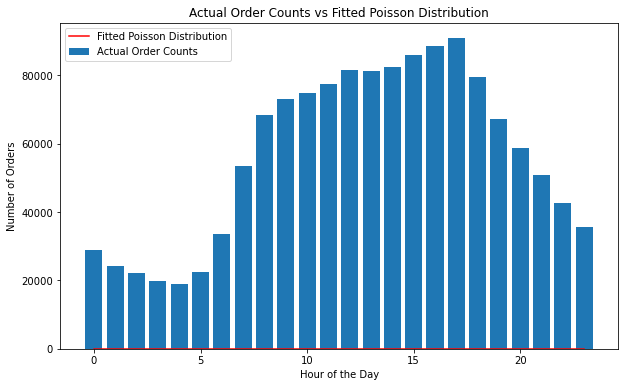

In [242]:
import pandas as pd
import numpy as np
from scipy.stats import poisson
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Load the data
data1 = pd.read_csv(r'C:\Users\deshp\OneDrive\Desktop\internship tasks\diminos_data_v2\orders.csv')
data2 = pd.read_csv(r'C:\Users\deshp\OneDrive\Desktop\internship tasks\diminos_data_v2\deliveries.csv')
data = pd.merge(data1, data2, on='order_id')

# Convert the 'time_stamp' column to datetime format
data['time_stamp'] = pd.to_datetime(data['time_stamp'])

# Extract the hour from the timestamp
data['hour'] = data['time_stamp'].dt.hour

# Group by hour and count the number of orders
order_counts = data.groupby('hour').size()

# Define the Poisson function to fit
def poisson_func(x, mu):
    return poisson.pmf(x, mu)

# Fit the Poisson distribution to the data
popt, _ = curve_fit(poisson_func, order_counts.index, order_counts, p0=[order_counts.mean()])

# Generate x values for the plot
x_values = np.arange(0, 24)

# Generate the probabilities for the fitted Poisson distribution
fitted_poisson = poisson_func(x_values, *popt)

# Plot the actual order counts and the fitted Poisson distribution
plt.figure(figsize=(10, 6))
plt.bar(order_counts.index, order_counts, label='Actual Order Counts')
plt.plot(x_values, fitted_poisson * len(data), 'r-', label='Fitted Poisson Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Actual Order Counts vs Fitted Poisson Distribution')
plt.legend()
plt.show()


### :- problem for owner of Pizza Store can be solved by increasing the  working staff  number from 10th hour  to  18th  hour  time. 